<a href="https://colab.research.google.com/github/ravising-h/One-Fourth-Labs/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In this notebook, I am working on Internship Task of One Fourth Labs. I am provided with Extended MNIST Dataset.
This is First Task's Notebook.

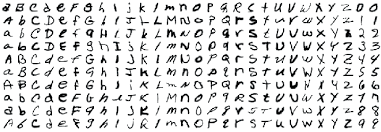

### Task 1: Letter/Digit Classifier 
Given an image, you must be able to classify whether the image is a letter or a digit.

***Expected outcome***:  You are expected to use a ML-based model (like CNNs, etc.) to solve the problem with a reasonably high accuracy.

You are given a dataset containing 28x28 grayscale images. Each image is either a handwritten letter or digit.
The dataset is present as a CSV file. You’ll find two CSV files: Train-set and Test-set.
You are supposed to train only using the train-set and use test-set only for calculating accuracy.

### Task 2: Vowel/Consonant and Even/Odd Classifier (Moderate)
Given an image, you are supposed to design model(s) which does the following:
1. If the image is a letter, you are supposed to predict if it is a vowel or consonant.
2. If the image is a digit, you are supposed to predict if it is an even or odd number.

You are supposed to use only ML models that directly predicts the above, instead of doing manual predictions like using modulus operator on top of digit predictions.

***Expected outcome:***  Given an image, your end-to-end setup must print whether it is a letter or digit, and based on that, it must automatically run the corresponding model to print if it is vowel/consonant or even/odd respectively.

### Task 3: Character Classifier
Given an image, you are supposed to predict what digit or letter the image contains.
That is, you will be doing a classification task for 47 classes.

***Expected outcome:***  Given an image, you have to print what character it is (just using a single model). Also, report the class-wise accuracy if possible.

***Submission Rules:***
The deadline for this round is 17-Nov-2019 (Sunday 11:59PM IST)
It’s OK to submit how much ever you have completed within the deadline.
You are required to push all your source code to your Github repository.
After you have completed as many tasks as possible, you are required to fill the following Google Form with all the details required.

***Round-1 Submission Form***

You are expected to report the accuracies you obtained for all the tasks and the techniques you used by explaining them all in your Github repository’s `README.md` file.
You are also expected to push your trained models to the repo, and add instructions on how to load the model and run the code.
Do not use a single end-to-end model to solve all 3 tasks. Train different models specific to each task.


***Number of samples:***

**Train set	: 112,800	(2400 images per class)**

**Test set	: 18,800	(  400 images per class)**

**CSV format:**
Each line in the csv file corresponds to 1 sample. Each line will contain 785 values.
The first value in all lines indicate the label ID, and the remaining 784 values corresponds to the individual pixel values of the 28*28 image (serialized in column-major order)

The ASCII value of each label ID can be found in the mapping.txt file.
For example, a label ID of 10 has an ASCII value of 65, which means that it corresponds to the character ‘A’.

In [0]:
## IMAGE PROCESSING
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # Plotting Graphsand Image
from math import floor # Round OFF
import seaborn as sns # Plotting
import base64 # CODING

## UTILS
import random # generating Random Number
import warnings # Removing Warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import ImageDataGenerator # Data Augumentation
from tqdm import tqdm # ProgressBar
from IPython.display import HTML # Dataset Download

## MODELS
from keras.layers import Input,Conv2D,Dense, Dropout, BatchNormalization, MaxPool2D, Activation, Flatten, AvgPool2D,GlobalMaxPooling2D # KERAS LAYERS
from keras.layers import  BatchNormalization as btn # BatchNormalization
from keras.regularizers import l2
from keras.models import Model, Sequential  #model
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [29]:
!nvidia-smi

Sun Nov 17 14:34:30 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    67W / 149W |   4322MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Input data files are available in the  directory.
import os
print("Files in the Dataset:-")
for dirname, _, filenames in os.walk("/content/drive/My Drive/Character + Digits data"):
    for filename in filenames:
        print( os.path.join(dirname, filename))

Files in the Dataset:-
/content/drive/My Drive/Character + Digits data/characters-digits-mapping.txt
/content/drive/My Drive/Character + Digits data/Readme.txt
/content/drive/My Drive/Character + Digits data/characters-digits-test.csv
/content/drive/My Drive/Character + Digits data/characters-digits-train.csv
/content/drive/My Drive/Character + Digits data/utils.py
/content/drive/My Drive/Character + Digits data/build_model.py
/content/drive/My Drive/Character + Digits data/TrainingBasicModel.ipynb
/content/drive/My Drive/Character + Digits data/result_Task2.csv
/content/drive/My Drive/Character + Digits data/result_Task1.csv
/content/drive/My Drive/Character + Digits data/Task3.ipynb
/content/drive/My Drive/Character + Digits data/Task2.ipynb
/content/drive/My Drive/Character + Digits data/Task1.ipynb
/content/drive/My Drive/Character + Digits data/clf.pdf
/content/drive/My Drive/Character + Digits data/clf
/content/drive/My Drive/Character + Digits data/__pycache__/utils.cpython-36.p

In [0]:
train_csv = pd.read_csv('/content/drive/My Drive/Character + Digits data/characters-digits-train.csv',header=None)
test_csv = pd.read_csv('/content/drive/My Drive/Character + Digits data/characters-digits-test.csv',header=None)

In [33]:
train_csv.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


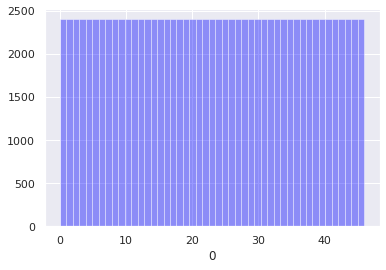

In [34]:
sns.set(color_codes=True)
sns.distplot(train_csv.iloc[:,0],label = 'LABELS',kde=False
             ,color='blue',norm_hist=False);

*Note: We can clearly see we do not have problem of Imbalance Class as every class has good representations*

## Insight of dataset

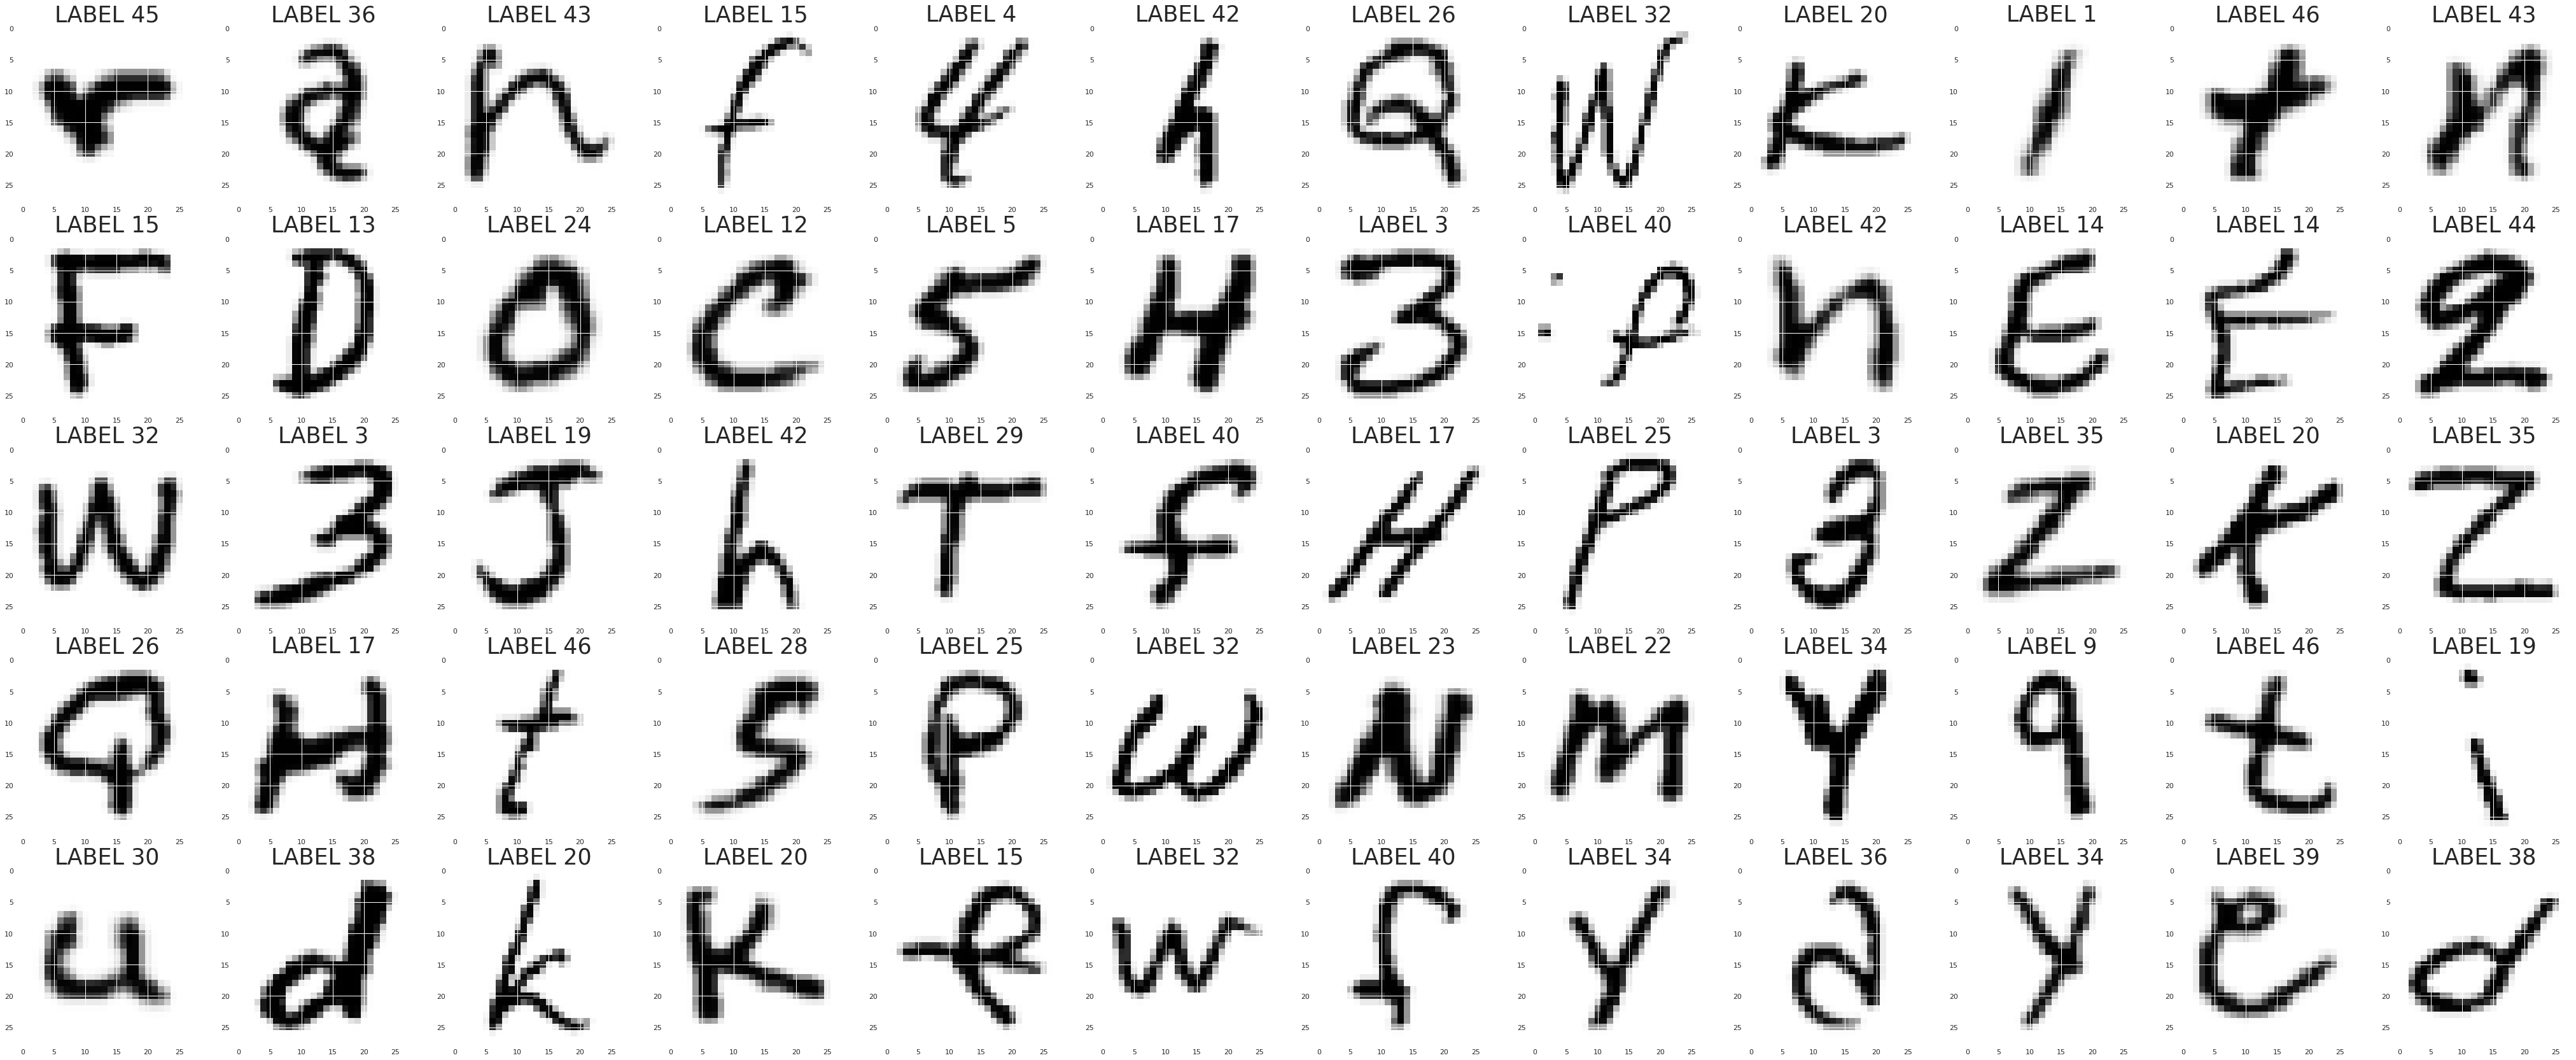

In [35]:
size_of_img = (int(np.sqrt(train_csv.shape[1])),int(np.sqrt(train_csv.shape[1])))
fig=plt.figure(figsize=(72,72))
for i in range(60):
    ax=fig.add_subplot(12,12,i+1)
    plot_image = np.array(train_csv.iloc[i,1:]).reshape(size_of_img)
    ax.imshow(np.fliplr(np.rot90(plot_image,3)),cmap='Greys')
    ax.set_title('LABEL ' + str(train_csv.iloc[i,0]),fontsize= 35)
plt.show()

In [36]:
labels = np.unique(train_csv.iloc[:,0])
print("Total Labels",  labels)

Total Labels [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


# Utility Function

In [37]:
%cd /content/drive/My Drive/Character\ +\ Digits\ data/

/content/drive/My Drive/Character + Digits data


In [0]:
from utils import *

## Dataset Preprocessing

In [39]:
train_feature, train_labels, dev_feature, dev_labels,_,__ = dataset_distribution(train_csv,[80,20,0])
train_feature.shape, train_labels.shape, dev_feature.shape, dev_labels.shape

((90240, 784), (90240,), (22560, 784), (22560,))

In [0]:
train_image = change_to_image(train_feature)
dev_image   = change_to_image(dev_feature)

In [0]:
train_labelen = one_hot_encoding(train_labels)
dev_labelen   = one_hot_encoding(dev_labels)

In [42]:
no_of_class = len(labels)
print("no_of_class : ",no_of_class)
print("train_image.shape : ",train_image.shape)
print("dev_image.shape : ",dev_image.shape)
print("train_label.shape : ",train_labelen.shape)
print("dev_label.shape: ",dev_labelen.shape)
print("train_feature: ",train_feature.shape)
print("train_labels.shape : ",train_labels.shape)
print("train_feature: ",dev_feature.shape)
print("train_labels.shape : ",dev_labels.shape)

no_of_class :  47
train_image.shape :  (90240, 28, 28, 1)
dev_image.shape :  (22560, 28, 28, 1)
train_label.shape :  (90240, 47)
dev_label.shape:  (22560, 47)
train_feature:  (90240, 784)
train_labels.shape :  (90240,)
train_feature:  (22560, 784)
train_labels.shape :  (22560,)


## Data Augmentation

A convolutional neural network that can robustly classify objects even if its placed in different orientations is said to have the property called invariance. More specifically, a CNN can be invariant to translation, viewpoint, size or illumination (Or a combination of the above).

This essentially is the premise of data augmentation. In the real world scenario, we may have a dataset of images taken in a limited set of conditions. But, our target application may exist in a variety of conditions, such as different orientation, location, scale, brightness etc. We account for these situations by training our neural network with additional synthetically modified data.

some basic but powerful augmentation techniques that are popularly used. Before we explore these techniques, for simplicity, let us make one assumption. The assumption is that, we don’t need to consider what lies beyond the image’s boundary. We’ll use the below techniques such that our assumption is valid.

What would happen if we use a technique that forces us to guess what lies beyond an image’s boundary? In this case, we need to interpolate some information. We’ll discuss this in detail after we cover the types of augmentation.

In [0]:
datagen = ImageDataGenerator( 
        zoom_range = 0.090,  
        width_shift_range=0.02, 
        height_shift_range=0.02)

### Stacked Models
Stacking is a way to ensemble multiple classifications or regression model. There are many ways to ensemble models, the widely known models are Bagging or Boosting. Bagging allows multiple similar models with high variance are averaged to decrease variance. Boosting builds multiple incremental models to decrease the bias, while keeping variance small.

Stacking (sometimes called Stacked Generalization) is a different paradigm. The point of stacking is to explore a space of different models for the same problem. The idea is that you can attack a learning problem with different types of models which are capable to learn some part of the problem, but not the whole space of the problem. So, you can build multiple different learners and you use them to build an intermediate prediction, one prediction for each learned model. Then you add a new model which learns from the intermediate predictions the same target. This final model is said to be stacked on the top of the others, hence the name. Thus, you might improve your overall performance, and often you end up with a model which is better than any individual intermediate model. Notice however, that it does not give you any guarantee, as is often the case with any machine learning technique.

In [44]:
nets = 10
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(128, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(128, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(256, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(256, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(256, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.44))

    model[j].add(Conv2D(1024, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.44))
    #model[j].add(Dense(64,activation = 'relu'))
    model[j].add(Dense(47, activation='softmax'))

    
    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
    model[j].compile(optimizer='RMSprop', loss="categorical_crossentropy", metrics=["accuracy"])
model[0].summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_176 (Conv2D)          (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_176 (Bat (None, 26, 26, 128)       512       
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_177 (Bat (None, 24, 24, 128)       512       
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 12, 12, 128)       409728    
_________________________________________________________________
batch_normalization_178 (Bat (None, 12, 12, 128)       512       
_________________________________________________________________
dropout_76 (Dropout)         (None, 12, 12, 128)     

In [45]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
nets = 10
batch_size = 512
history = [0] * nets
epochs = 12
for j in range(nets):
    history[j] = model[j].fit_generator(datagen.flow(train_image,train_labelen, batch_size=batch_size),
        epochs = epochs, steps_per_epoch = dev_image.shape[0]//batch_size,  
        validation_data = (dev_image,dev_labelen), callbacks=[annealer], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))
    model[j].save_weights("model/model_" + str(j) +".h5")

CNN 1: Epochs=12, Train accuracy=0.86439, Validation accuracy=0.87252
CNN 2: Epochs=12, Train accuracy=0.85920, Validation accuracy=0.87513
CNN 3: Epochs=12, Train accuracy=0.86217, Validation accuracy=0.87602
CNN 4: Epochs=12, Train accuracy=0.86066, Validation accuracy=0.87841
CNN 5: Epochs=12, Train accuracy=0.86368, Validation accuracy=0.87509
CNN 6: Epochs=12, Train accuracy=0.85865, Validation accuracy=0.87340
CNN 7: Epochs=12, Train accuracy=0.86235, Validation accuracy=0.87598
CNN 8: Epochs=12, Train accuracy=0.85626, Validation accuracy=0.87416
CNN 9: Epochs=12, Train accuracy=0.85955, Validation accuracy=0.87425
CNN 10: Epochs=12, Train accuracy=0.86182, Validation accuracy=0.86981


**Almost no overfitting due to:-**

**droupout layers**

Dropout Regularization For Neural Networks Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting (download the PDF).

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.


 *Also you can use* 

*weight regularization*

Keras provides a weight regularization API that allows you to add a penalty for weight size to the loss function.

Three different regularizer instances are provided; they are:

**L1:** Sum of the absolute weights.**L2:** Sum of the squared weights. L1L2: Sum of the absolute and the squared weights. The regularizers are provided under keras.regularizers and have the names l1, l2 and l1_l2. Each takes the regularizer hyperparameter as an argument.

FOR CNN  0


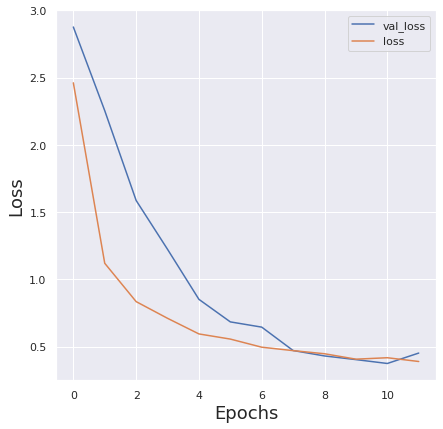

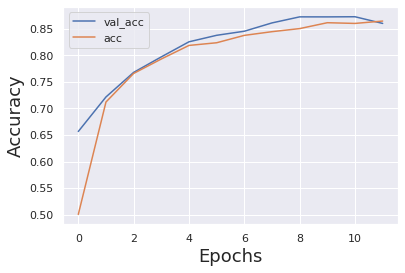

In [46]:
name_title = ['Loss','Accuracy']
for net in range(1):
    print("FOR CNN ",net)
    fig=plt.figure(figsize=(64,64))
    for i in range(0,2):
        ax=fig.add_subplot(8,8,i+1)
        plt.plot(history[net].history[list(history[net].history.keys())[i]], label = list(history[net].history.keys())[i] )
        plt.plot(history[net].history[list(history[net].history.keys())[i+2]],label = list(history[net].history.keys())[i+2] )
        plt.xlabel('Epochs', fontsize=18)
        plt.ylabel(name_title[i], fontsize=18)
        plt.legend()
        plt.show()

In [0]:
from tqdm import tqdm
def result(model,image):
  result = np.zeros((image.shape[0],47))
  for model_ in model:
    result += model_.predict(image)
  return np.argmax(result,axis = 1).reshape(-1,1)

In [0]:
y_tr = result(model,train_image)
y_dev = result(model,dev_image)

Recall: [0.66598361 0.67307692 0.88577154 0.97773279 0.96868476 0.90388548
 0.93897638 0.96900826 0.94238683 0.62828947 0.96801706 0.96247241
 0.98163265 0.93147752 0.98526316 0.71495327 0.94725738 0.96370968
 0.69811321 0.9379015  0.97533207 0.44094488 0.9847619  0.94845361
 0.69473684 0.97008547 0.951417   0.97119342 0.93526786 0.94466403
 0.93791574 0.92965779 0.97768763 0.98155738 0.92778993 0.94375
 0.94004283 0.93899782 0.98181818 0.96273292 0.63706564 0.84383562
 0.96039604 0.97452229 0.79591837 0.98409091 0.90871369]
Precision: [0.67708333 0.20547945 0.93248945 0.9897541  0.94501018 0.95053763
 0.93713163 0.97912317 0.95020747 0.91826923 0.97634409 0.9753915
 0.97171717 0.94978166 0.97703549 0.612      0.94327731 0.98353909
 0.62315789 0.95217391 0.98467433 0.79674797 0.99042146 0.98712446
 0.68041237 0.97216274 0.97107438 0.98128898 0.90889371 0.96177062
 0.94       0.972167   0.98770492 0.96184739 0.9339207  0.89880952
 0.93205945 0.94933921 0.9739479  0.98516949 0.69473684 0

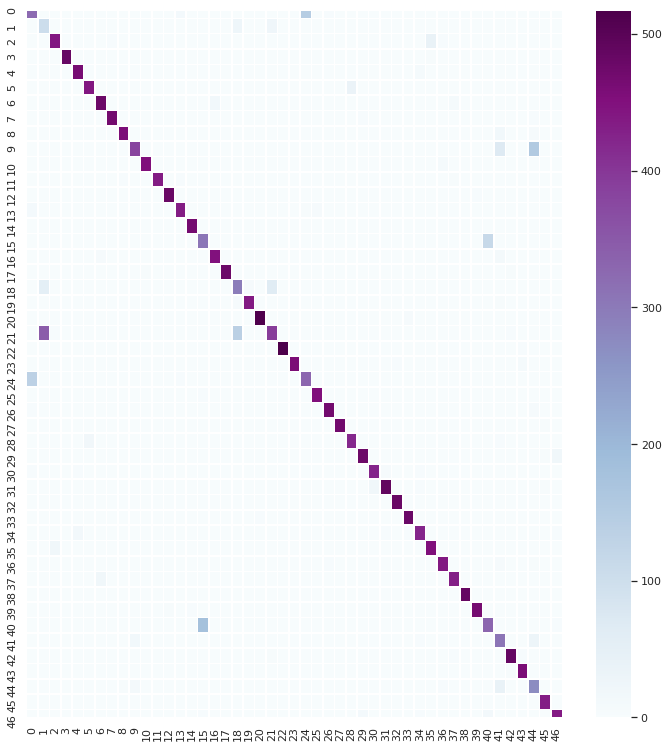

In [59]:
acc(y_dev, dev_labels,cmap = "BuPu")

In [0]:
def predict(model,test_csv):
  if type(test_csv) is str:
    test_csv = pd.read_csv(test_csv,header=None)
  test_feature, test_labels,_,_,_,_ = dataset_distribution(test_csv,[100,0,0])
  print("Shape of feature and labels are:- ",test_feature.shape, test_labels.shape)
  test_image = change_to_image(test_feature)
  test_labelenLD = one_hot_encoding(test_labels)
  y =  result(model,test_image)
  acc(test_labels.reshape(-1,1),y,"BuPu")
  print("Accuracy is :- ",accuracy_score(test_labels.reshape(-1,1),y))
  index = np.arange(test_labels.shape[0]).reshape(-1,1)
  data = pd.DataFrame(np.concatenate((index,y),axis = 1))
  data.to_csv("result_Task2.csv",index = None,header = ["index","Y"])

Shape of feature and labels are:-  (18800, 784) (18800,)
Recall: [0.7175 0.1775 0.93   0.99   0.9225 0.925  0.9325 0.9925 0.9575 0.9175
 0.99   0.9775 0.9575 0.94   0.98   0.61   0.96   0.9775 0.6325 0.9675
 0.9725 0.8225 0.9925 0.9775 0.6875 0.97   0.965  1.     0.9325 0.945
 0.935  0.96   0.995  0.96   0.9225 0.92   0.92   0.9425 0.9775 0.975
 0.695  0.645  0.95   0.9175 0.5025 0.935  0.9325]
Precision: [0.68660287 0.65137615 0.90731707 0.99497487 0.94615385 0.92964824
 0.95886889 0.97542998 0.95037221 0.65186501 0.98019802 0.97994987
 0.95989975 0.92383292 0.98740554 0.71764706 0.94348894 0.96068796
 0.72492837 0.92805755 0.98232323 0.44761905 0.97066015 0.94673123
 0.70512821 0.97       0.93012048 0.9569378  0.9097561  0.92420538
 0.96143959 0.91866029 0.98271605 0.99481865 0.93654822 0.93877551
 0.89756098 0.92401961 0.97994987 0.98236776 0.6450116  0.83766234
 0.9382716  0.94832041 0.77011494 0.95165394 0.90754258]

 clasification report:
               precision    recall  f1-sc

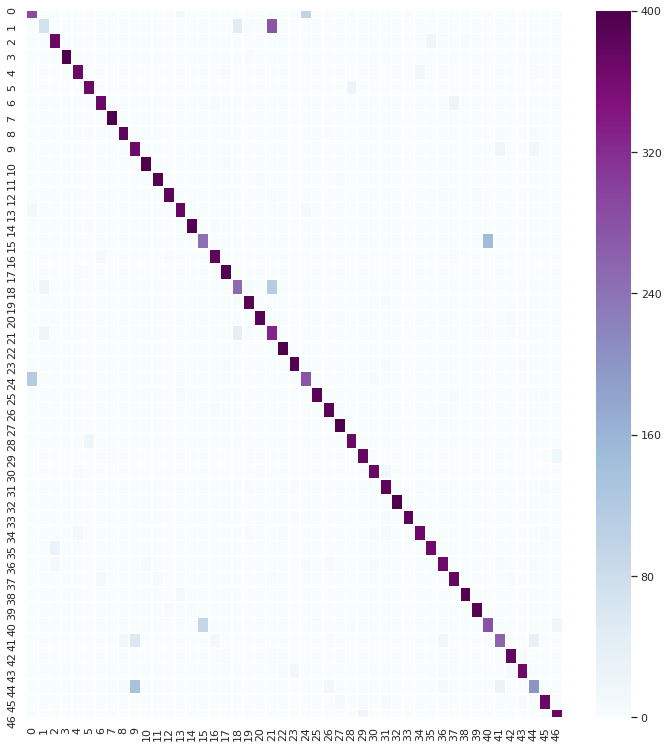

In [69]:
predict(model,test_csv)